# Lezione 5

Filtraggio non lineare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.ndimage as ndi
plt.rcParams['figure.figsize'] = [10, 5]

Text(0.5, 1.0, "Spettro d'ampiezza")

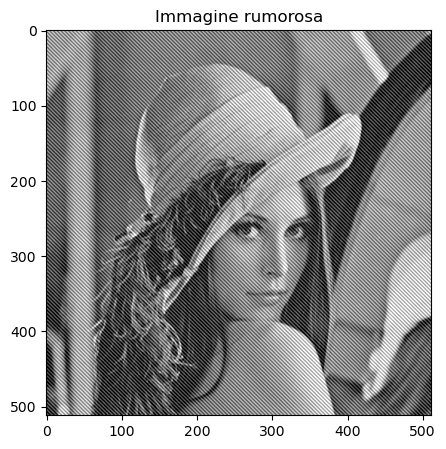

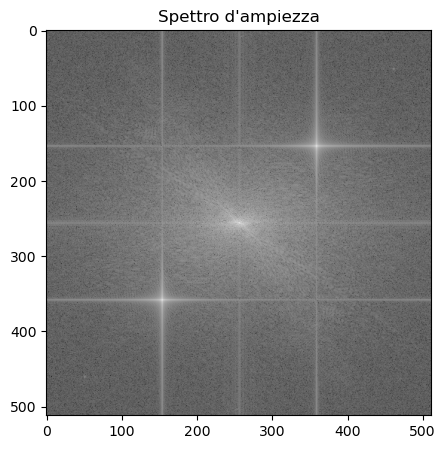

In [ ]:
x = np.fromfile("lenarumorosa.y", np.int16)
x = np.reshape(x, [512,512])

x = np.float64(x)
plt.figure()
plt.imshow(x, clim=[0,256], cmap="gray")
plt.title("Immagine rumorosa")

X = np.fft.fftshift(np.fft.fft2(x))
plt.figure()
plt.imshow(np.log(1+np.abs(X)), clim=None, cmap="gray")
plt.title("Spettro d'ampiezza")

# Devo sistemare l'immagine andando a filtrare la sinusoide presente sull'immagine
nu = 0.2
B = 0.03

m = np.fft.fftshift(np.fft.fftfreq(X.shape[0]))
n = np.fft.fftshift(np.fft.fftfreq(X.shape[1]))

l,k = np.meshgrid(n,m)

D = np.sqrt()



Text(0.5, 1.0, 'Trasformata di Fourier')

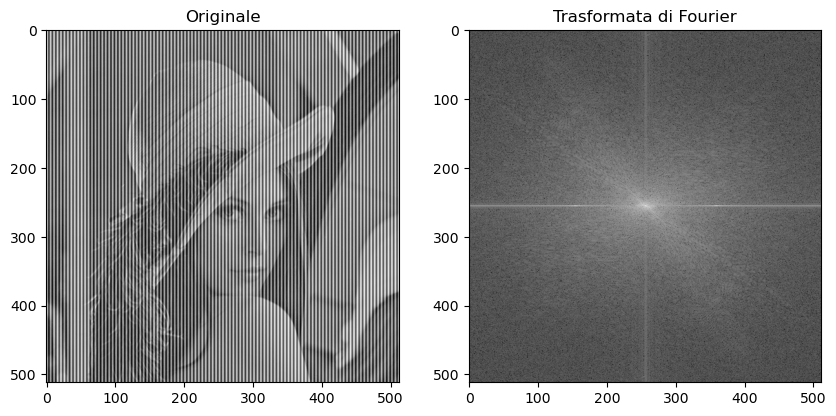

In [9]:
x = np.fromfile("lenarumorosa_verticale.y", np.int16)
x = np.reshape(x, [512,512])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")

X = np.fft.fftshift(np.fft.fft2(x))

plt.subplot(1,2,2)
plt.imshow(np.log(1+np.abs(X)), clim=None, cmap="gray")
plt.title("Trasformata di Fourier")


Esercizio prova

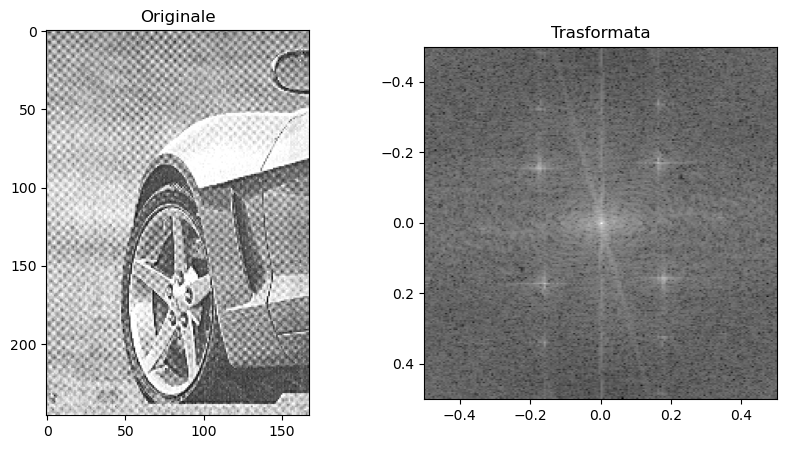

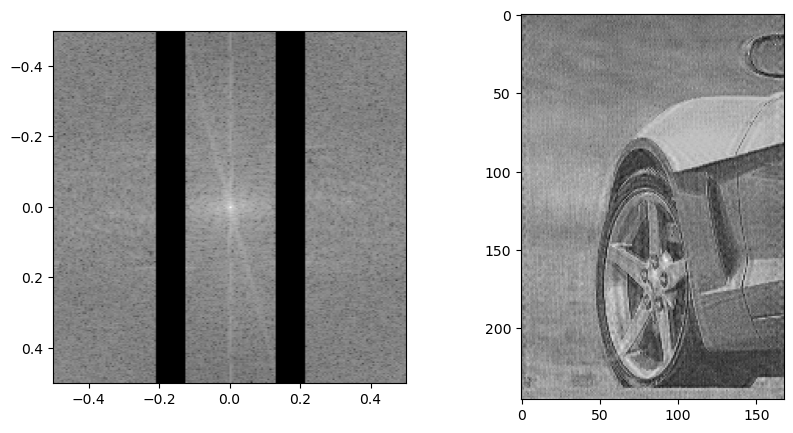

In [ ]:
x = io.imread("car.tif")
x = np.float32(x)

X = np.fft.fftshift(np.fft.fft2(x))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(np.log(1+np.abs(X)), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Trasformata")

mu = 0.17
B = 0.04
raggio = 0.1
angolo = 1

m = np.fft.fftshift(np.fft.fftfreq(x.shape[0]))
n = np.fft.fftshift(np.fft.fftfreq(x.shape[1]))

l,k = np.meshgrid(n,m)

# Lineari metodo naive
D1 = np.abs(l - mu) > B
D2 = np.abs(l + mu) > B

# Oblique
# D3 = np.abs(l - angolo*k) > B

# D4 = np.sqrt(l**2 + k ** 2) < raggio

# D5 = D4 | D3

D = D2 & D1

Y = D * X

y = np.real(np.fft.ifft2(np.fft.ifftshift(Y)))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(1+ np.abs(Y)), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.subplot(1,2,2)
plt.imshow(y, clim=None, cmap="gray")

## Colore

L'immagine a colori dev'essere normalizzata nel suo formato [0,1] altrimenti le funzioni ci picchiano

In [59]:
def rgb_to_cmy(x):
    # C = 1 - x[:,:,0]
    # M = 1 - x[:,:,1]
    # Y = 1 - x[:,:,2]
    # y = np.stack((C,M,Y), 2)

    y = 1 - x # Caso più veloce di effettuare la conversione
    return y

Text(0.5, 1.0, 'CMY')

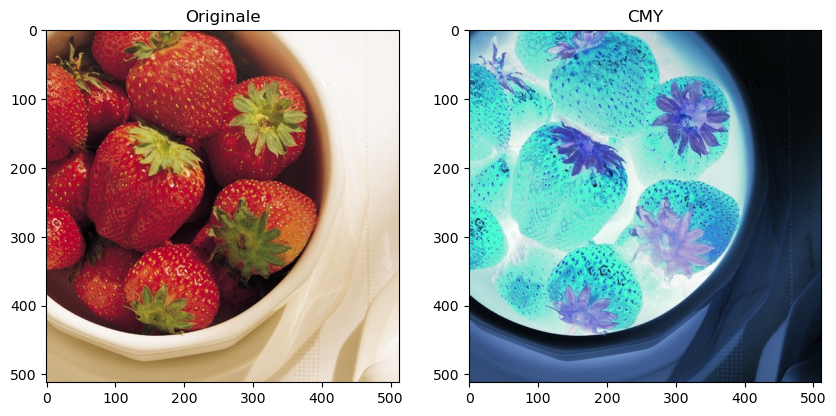

In [60]:
x = io.imread("fragole.jpg")

# Normalizzazione dell'immagine tra [0,1]
x = np.float64(x)/255

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x)
plt.title("Originale")

k = rgb_to_cmy(x)

plt.subplot(1,2,2)
plt.imshow(k)
plt.title("CMY")


### Elaborazione di immagini a colori

In [ ]:
# HSV
x = io.imread("fragole.jpg")

# Normalizzazione dell'immagine tra [0,1]
x = np.float64(x)/255

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x)
plt.title("Originale")

k = 

plt.figure()
plt.subplot(1,2,1)
plt.imshow(k)
plt.title("HSV")

Text(0.5, 1.0, 'Potenza')

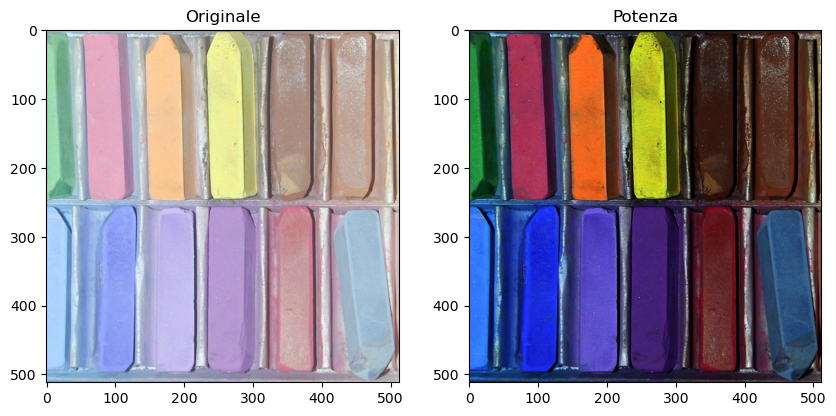

In [67]:
x = io.imread("colori.jpg")
x = np.float64(x)/255
y_pot = x ** 4

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x)
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(y_pot)
plt.title("Potenza")

Text(0.5, 1.0, 'PZ in HSV')

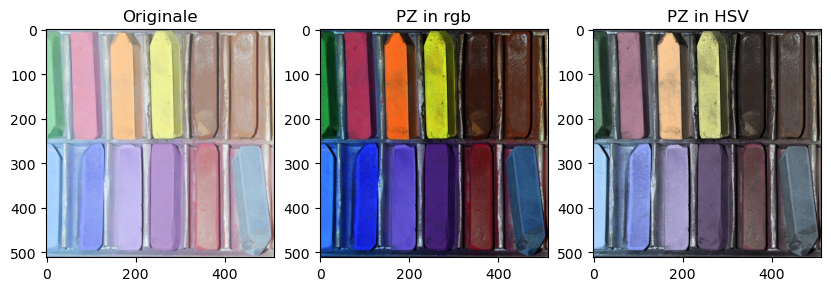

In [69]:
# Andare nello spazione HSV che è preferibile per le operazioni
from skimage.color import rgb2hsv, hsv2rgb

x = io.imread("colori.jpg")
x = np.float64(x)/255

x_hsv = rgb2hsv(x)

H = x_hsv[:, :, 0]
S = x_hsv[:, :, 1]
V = x_hsv[:, :, 2]

V = V ** 4

y_hsv = np.stack((H,S,V), -1)

y = hsv2rgb(y_hsv)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(x)
plt.title("Originale")
plt.subplot(1,3,2)
plt.imshow(y_pot)
plt.title("PZ in rgb")
plt.subplot(1,3,3)
plt.imshow(y)
plt.title("PZ in HSV")

### Color Balancing
Regolare le componenti di colore di un immagine

Text(0.5, 1.0, 'Modificata')

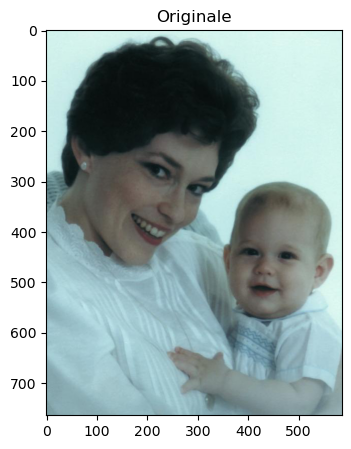

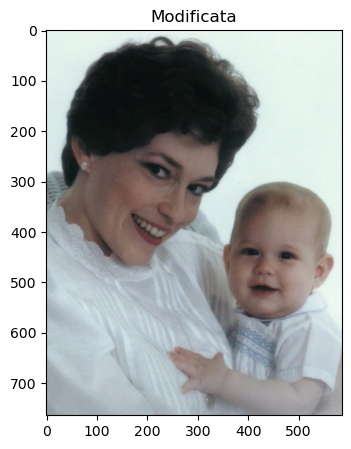

In [74]:
x = io.imread("foto.jpg")
x = np.float32(x)/255

plt.figure()
plt.imshow(x)
plt.title("Originale")

# Passo allo spazio CMY
x_cmy = 1 - x

C = x_cmy[:,:,0]
M = x_cmy[:,:,1]
Y = x_cmy[:,:,2]

C = C ** 1.3

y_modf = np.stack((C,M,Y), -1)

y_rgb = 1 - y_modf

plt.figure()
plt.imshow(y_rgb)
plt.title("Modificata")

## Filtraggio spaziale

In [ ]:
# Bisogna stare attenti alla definizione dei filtri in maniera opportuna
# Per capire come utilizzare le varie componenti

# Si possono effettuare i filtraggi sulle singole componenti scomponendo prima l'immagine e poi ricomponendola


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


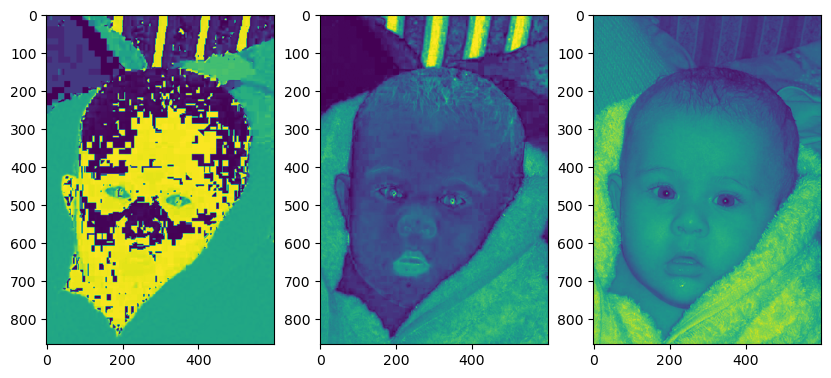

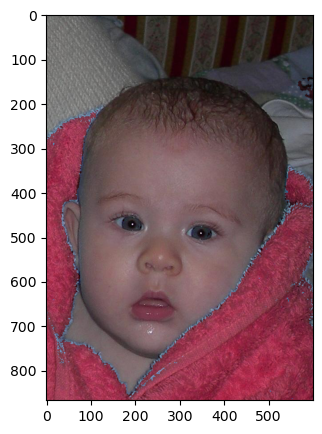

In [ ]:
from skimage.color import rgb2hsv, hsv2rgb

x = io.imread("azzurro.jpg")
x = np.float32(x)/255

x_hsv = rgb2hsv(x)

H = x_hsv[:, :, 0]
S = x_hsv[:, :, 1]
V = x_hsv[:, :, 2]

plt.figure()
plt.subplot(1,3,1)
plt.imshow(H)
plt.subplot(1,3,2)
plt.imshow(S)
plt.subplot(1,3,3)
plt.imshow(V)

mask = (H < 0.62) & (H > 0.57) & (S > 0.4)

H += (-0.6*mask)%1
S += mask*0.1
V -= mask*0.15

# maski = 1-mask

# H = H*maski

new = np.stack((H,S,V), -1)

new_rgb = hsv2rgb(new)

plt.figure()
plt.imshow(new_rgb)